In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\airline.csv')
print (df)

       Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco 

In [9]:
train_df = pd.read_csv(r'C:\Users\ADMIN\Desktop\airline.csv')
test_df = pd.read_csv(r'C:\Users\ADMIN\Desktop\airline.csv')
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_df = train_df.iloc[:1500,::]
test_df = test_df.iloc[:300,::]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1503
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         1500 non-null   int64  
 1   id                                 1500 non-null   int64  
 2   Gender                             1500 non-null   object 
 3   Customer Type                      1500 non-null   object 
 4   Age                                1500 non-null   int64  
 5   Type of Travel                     1500 non-null   object 
 6   Class                              1500 non-null   object 
 7   Flight Distance                    1500 non-null   int64  
 8   Inflight wifi service              1500 non-null   int64  
 9   Departure/Arrival time convenient  1500 non-null   int64  
 10  Ease of Online booking             1500 non-null   int64  
 11  Gate location                      1500 non-null   int64

In [10]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [11]:
train_df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [12]:
train_df.drop(["Unnamed: 0","id"],axis=1, inplace=True)
train_df.satisfaction = [1 if x == "satisfied" else 0 for x in train_df.satisfaction]
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [13]:
train_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] + "_" + x.split()[3] if len(x.split()) > 3 else x for x in train_df.columns]
train_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] if len(x.split()) > 2 else x for x in train_df.columns]
train_df.columns = [x.split()[0] + "_" + x.split()[1] if len(x.split()) > 1 else x for x in train_df.columns]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1503
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1500 non-null   object 
 1   Customer_Type                      1500 non-null   object 
 2   Age                                1500 non-null   int64  
 3   Type_of_Travel                     1500 non-null   object 
 4   Class                              1500 non-null   object 
 5   Flight_Distance                    1500 non-null   int64  
 6   Inflight_wifi_service              1500 non-null   int64  
 7   Departure/Arrival_time_convenient  1500 non-null   int64  
 8   Ease_of_Online_booking             1500 non-null   int64  
 9   Gate_location                      1500 non-null   int64  
 10  Food_and_drink                     1500 non-null   int64  
 11  Online_boarding                    1500 non-null   int64

In [14]:
def bar_plot(variable):
    # we get the features
    var = train_df[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
     

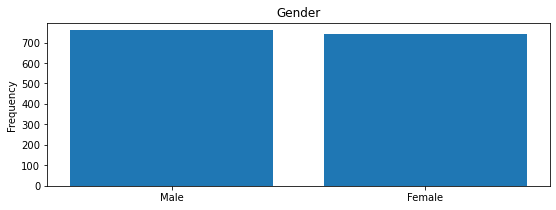

Gender: 
 Male      759
Female    741
Name: Gender, dtype: int64


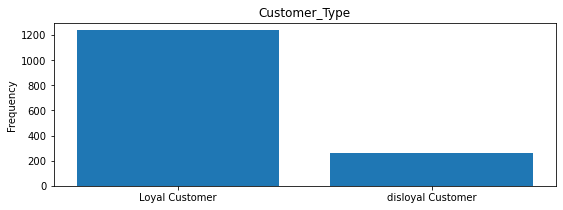

Customer_Type: 
 Loyal Customer       1236
disloyal Customer     264
Name: Customer_Type, dtype: int64


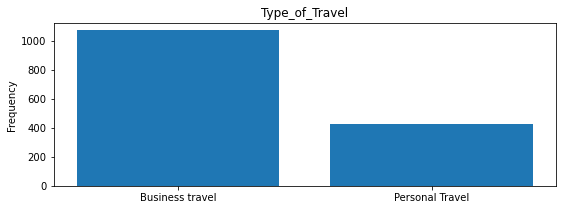

Type_of_Travel: 
 Business travel    1072
Personal Travel     428
Name: Type_of_Travel, dtype: int64


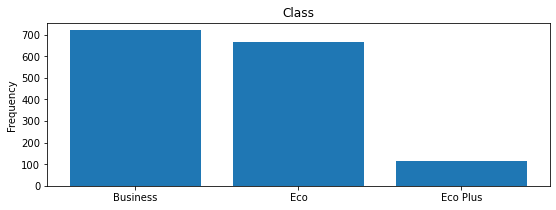

Class: 
 Business    719
Eco         664
Eco Plus    117
Name: Class, dtype: int64


In [15]:
categorical_var = ["Gender", "Customer_Type", "Type_of_Travel", "Class"]
for each in categorical_var:
    bar_plot(each)

   Gender  satisfaction
1    Male      0.467721
0  Female      0.452092


C:\Users\ADMIN\Documents\Custom Office Templates\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ADMIN\Documents\Custom Office Templates\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


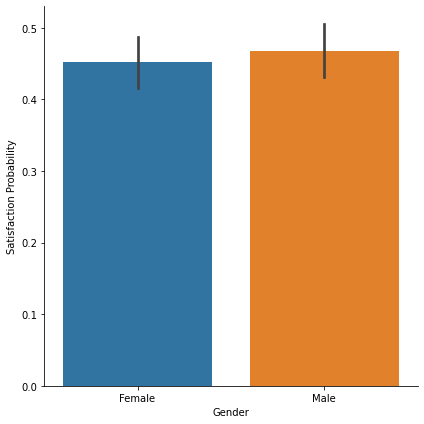

In [16]:
print(train_df[["Gender","satisfaction"]].groupby(["Gender"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))
g = sns.factorplot(x = "Gender", y = "satisfaction", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Satisfaction Probability")
plt.show()

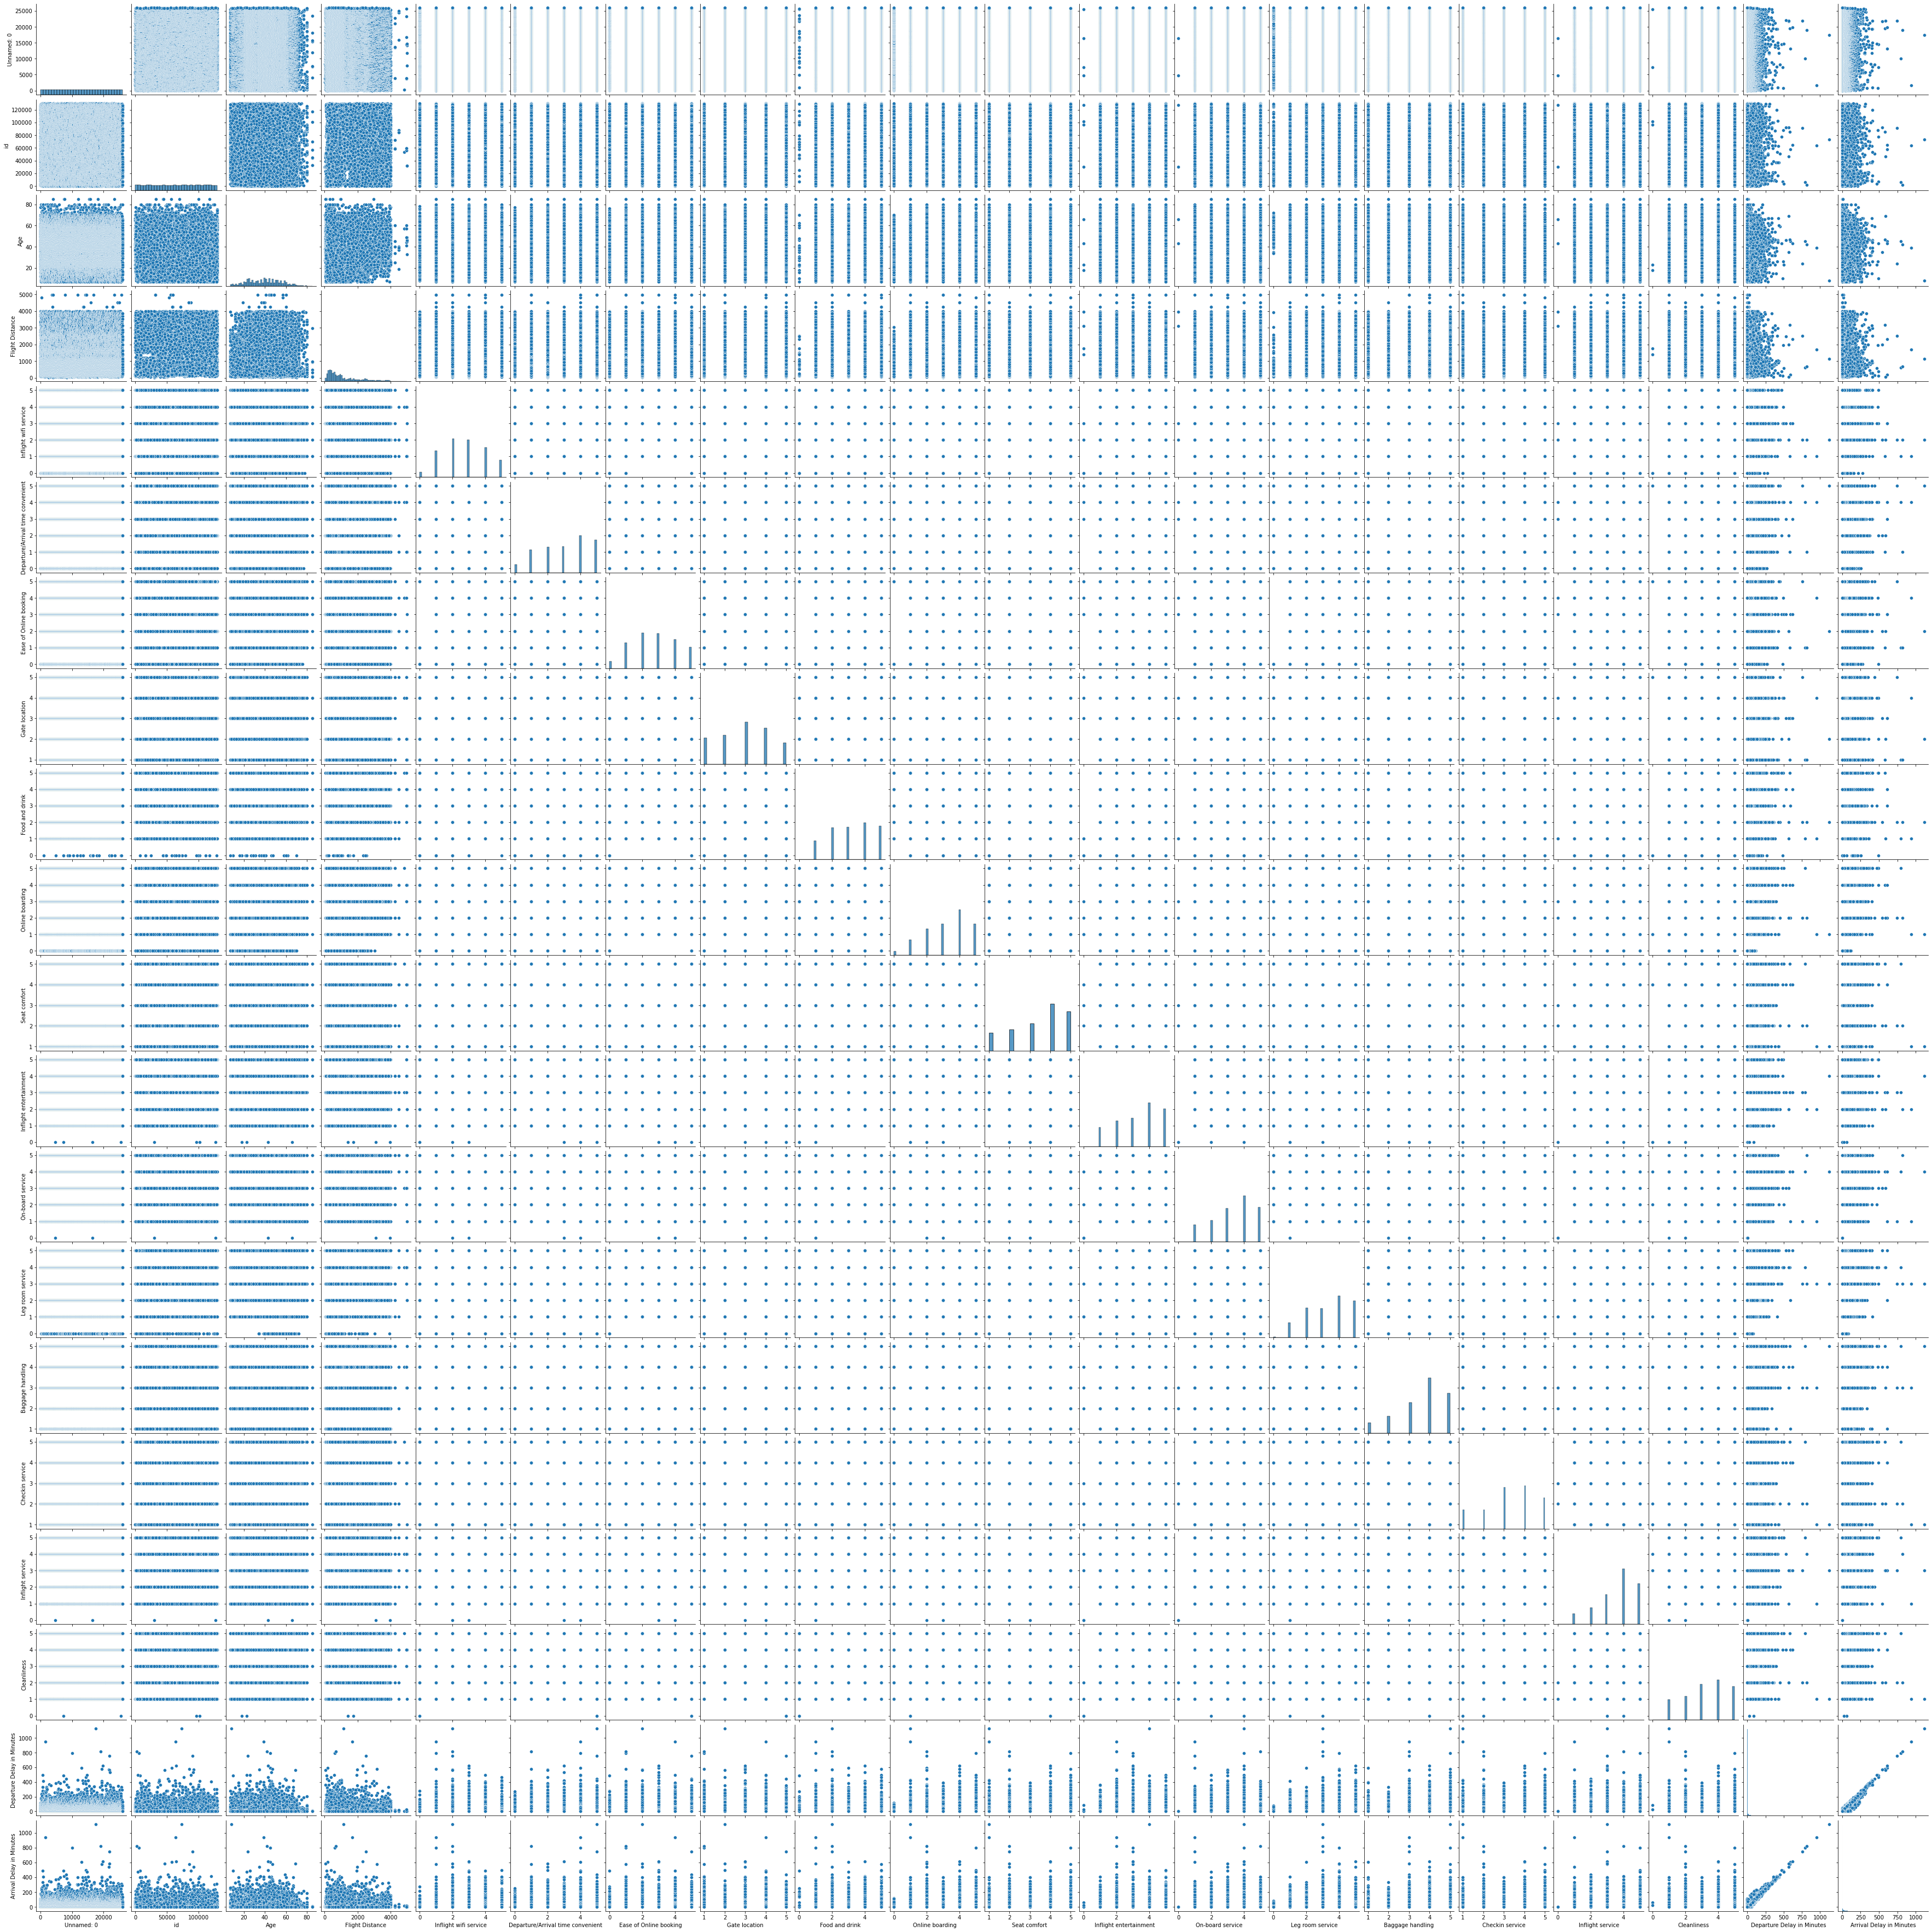

In [40]:
sns.pairplot(df)

       Customer_Type  satisfaction
0     Loyal Customer      0.508900
1  disloyal Customer      0.231061


C:\Users\ADMIN\Documents\Custom Office Templates\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ADMIN\Documents\Custom Office Templates\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


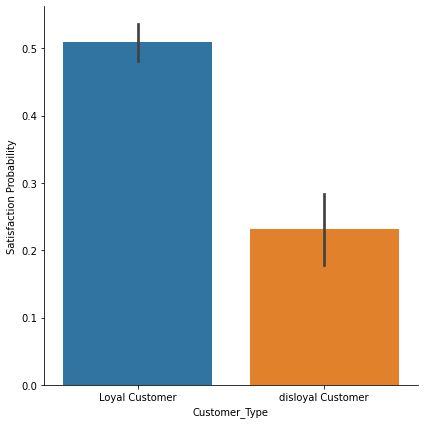

In [17]:
print(train_df[["Customer_Type","satisfaction"]].groupby(["Customer_Type"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))


g = sns.factorplot(x = "Customer_Type", y = "satisfaction", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Satisfaction Probability")
plt.show()

In [18]:
ctgrs = ["Gender","Customer_Type","Type_of_Travel"]

for x in ctgrs:
    
    train_df[x] = [1 if each == train_df[x].unique()[0] else 0 for each in train_df[x]]

In [19]:
train_df.Class = [1 if x == "Business" else 2 if x == "Eco Plus" else 3 for x in train_df.Class]

In [20]:
train_df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,1,52,1,3,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,1,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,3,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,1,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,3,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [21]:
test_df.drop(["Unnamed: 0","id"],axis=1, inplace=True)

test_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] + "_" + x.split()[3] if len(x.split()) > 3 else x for x in test_df.columns]
test_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] if len(x.split()) > 2 else x for x in test_df.columns]
test_df.columns = [x.split()[0] + "_" + x.split()[1] if len(x.split()) > 1 else x for x in test_df.columns]

In [22]:
test_df.satisfaction = [1 if x == "satisfied" else 0 for x in test_df.satisfaction]

test_df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [23]:
ctgrs2 = ["Gender","Customer_Type","Type_of_Travel"]
for x in ctgrs2:
    test_df[x] = [1 if each == test_df[x].unique()[0] else 0 for each in test_df[x]]
test_df.Class = [1 if x == "Business" else 2 if x == "Eco Plus" else 3 for x in test_df.Class]

In [24]:
x_train = train_df.drop(["satisfaction"],axis=1)
y_train = train_df.satisfaction.values
x_test = test_df.drop(["satisfaction"],axis=1)
y_test = test_df.satisfaction.values

In [25]:
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))

x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

C:\Users\ADMIN\Documents\Custom Office Templates\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ADMIN\Documents\Custom Office Templates\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()

log.fit(x_train,y_train)

pred = log.predict(x_test)

#Now let's see how successful our predictions are:
print("with Logistic Regression accuracy_score: ",accuracy_score(y_test,pred))

with Logistic Regression accuracy_score:  0.87


In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print("DecisionTreeClassifier: ", dt.score(x_test,y_test))

DecisionTreeClassifier:  0.99


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

rf.fit(x_train,y_train)

print("with Random Forest score: ",rf.score(x_test,y_test))

with Random Forest score:  1.0


In [30]:
#Fitting K-NN classifier to the training set  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#Predicting the test set result  
y_pred= classifier.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred) 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       160
           1       0.94      0.87      0.90       140

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



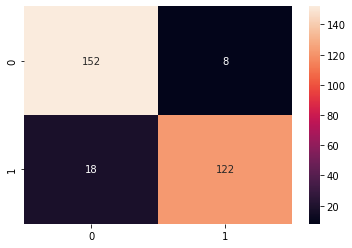

In [34]:
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

if k values is 1 value score 1.0
if k values is 2 value score 0.93
if k values is 3 value score 0.94
if k values is 4 value score 0.9166666666666666
if k values is 5 value score 0.9133333333333333
if k values is 6 value score 0.8933333333333333
if k values is 7 value score 0.8966666666666666
if k values is 8 value score 0.8933333333333333
if k values is 9 value score 0.8933333333333333
if k values is 10 value score 0.88
if k values is 11 value score 0.8866666666666667
if k values is 12 value score 0.88
if k values is 13 value score 0.8866666666666667
if k values is 14 value score 0.8866666666666667
if k values is 15 value score 0.88
if k values is 16 value score 0.89
if k values is 17 value score 0.8833333333333333
if k values is 18 value score 0.8833333333333333
if k values is 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


19 value score 0.8833333333333333


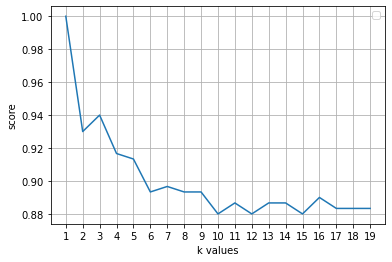

In [39]:
score_list = []

for x in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print("if k values is",x,"value score",knn2.score(x_test,y_test))


plt.plot(range(1,20),score_list)
plt.xticks(range(1,20))
plt.xlabel("k values")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()